###### Street network centrality analysis, Ref:https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/08-example-line-graph.ipynb

In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


'1.1.2'

c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


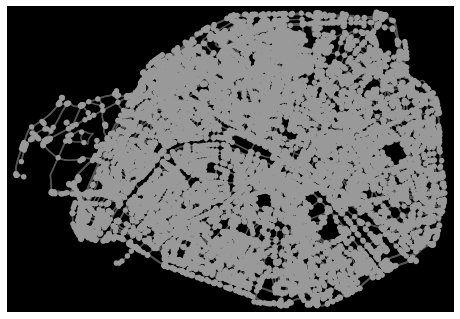

In [2]:
# download and project a street network
G = ox.graph_from_place('Paris', network_type='drive')
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## Calculate and visualize node centrality

In [3]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

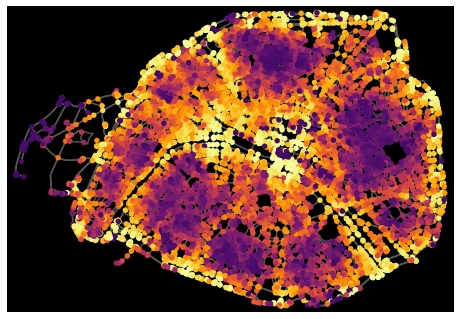

In [4]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## Calculate and visualize edge centrality

In [5]:
# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

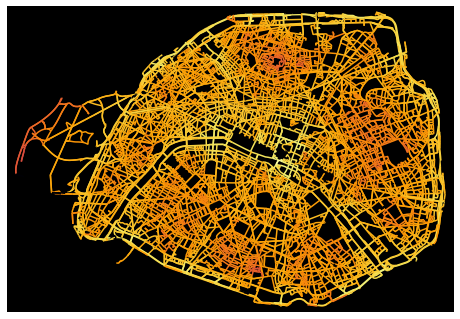

In [6]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [7]:
# save a shapefile with centrality as node and edge attributes
nx.set_node_attributes(G, node_centrality, 'node_centrality')
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(G)

c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\osmnx\io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


## save edge_centrality as csv

In [ ]:
print (edge_centrality)

In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(edge_centrality,orient='index')

In [16]:
print (df)

                                    0
(125730, 268675130, 0)       0.022484
(268675130, 125730, 0)       0.022042
(268675130, 567367734, 0)    0.022042
(268675130, 567367770, 0)    0.022042
(125730, 21112878, 0)        0.022484
...                               ...
(9187101869, 27286622, 0)    0.000000
(9189984796, 203333251, 0)   0.000000
(9325771781, 94145388, 0)    0.000000
(9432324889, 9432324890, 0)  0.000000
(9432324889, 25581039, 0)    0.000000

[18713 rows x 1 columns]


In [22]:
df.to_csv("centrality_paris.csv", encoding='utf-8',header=False)